# Phân tích dữ liệu

In [1]:
import pandas as pd

# Đọc file CSV
df = pd.read_csv("../logic_app/common/csv/2D_distance.csv")  # <-- Thay bằng đường dẫn thực tế

# In toàn bộ bảng dữ liệu
print("🔹 Dữ liệu gốc:")
print(df)

# Xóa cột Distance7 (cm)
df_filtered = df.drop(columns=["Distance7 (cm)"])

# Phân tích thống kê nhanh
print("\n🔹 Mô tả thống kê:")
print(df_filtered.describe())

# Tách features và label
X = df_filtered.drop(columns=["Height_truth (cm)"])
y = df_filtered["Height_truth (cm)"]

print("\n🔹 Các cột đặc trưng (X):")
print(X.columns.tolist())

print("\n🔹 Nhãn mục tiêu (y):")
print(y.head())


🔹 Dữ liệu gốc:
      Pose  Distance1 (cm)  Distance2 (cm)  Distance3 (cm)  Distance4 (cm)  \
0        5       10.083090       55.310513       51.580327       70.739461   
1        5        7.223173       44.341014       45.818161       62.197025   
2        5        7.672874       51.163753       53.128467       74.722304   
3        5        7.733042       52.830722       52.889894       70.986455   
4        6        6.418526       39.940463       43.252746       60.287254   
...    ...             ...             ...             ...             ...   
1603     6        8.699247       54.591024       48.031946       74.208071   
1604     6        8.947866       54.963081       49.863255       71.094924   
1605     6        9.748231       62.602259       57.121410       76.137154   
1606     6        8.354013       64.687571       60.581497       79.715440   
1607     6        9.763487       61.915911       56.252600       81.299906   

      Distance5 (cm)  Distance6 (cm)  Distance7 

/tmp/ipykernel_1744/3012650435.py:20: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/unicode/miniconda3/envs/datn/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


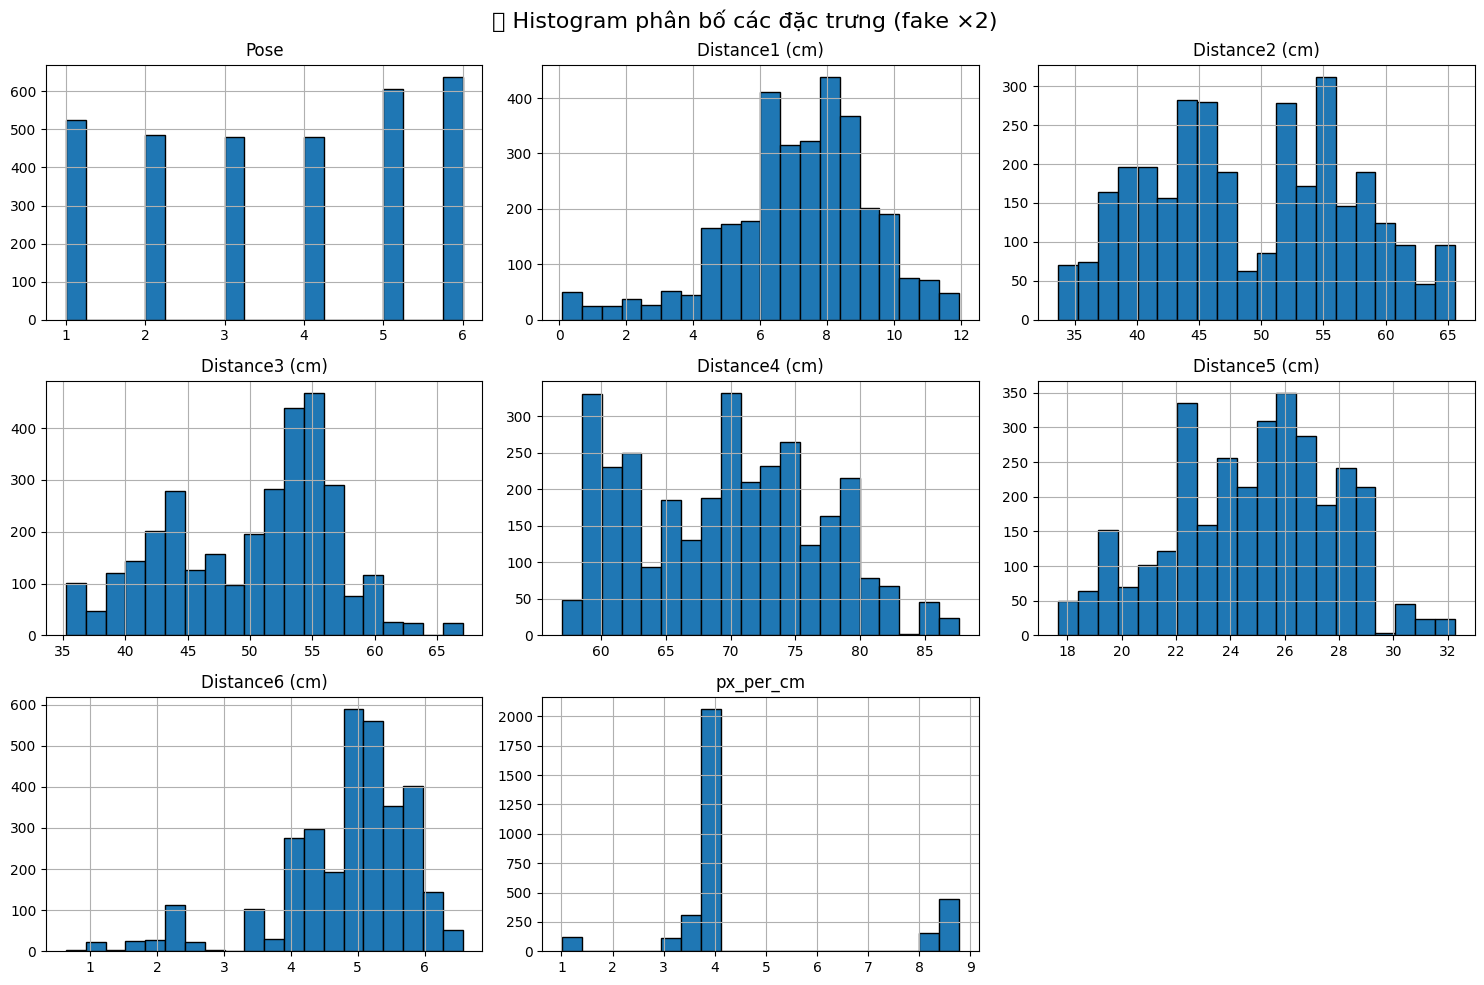

/home/unicode/miniconda3/envs/datn/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


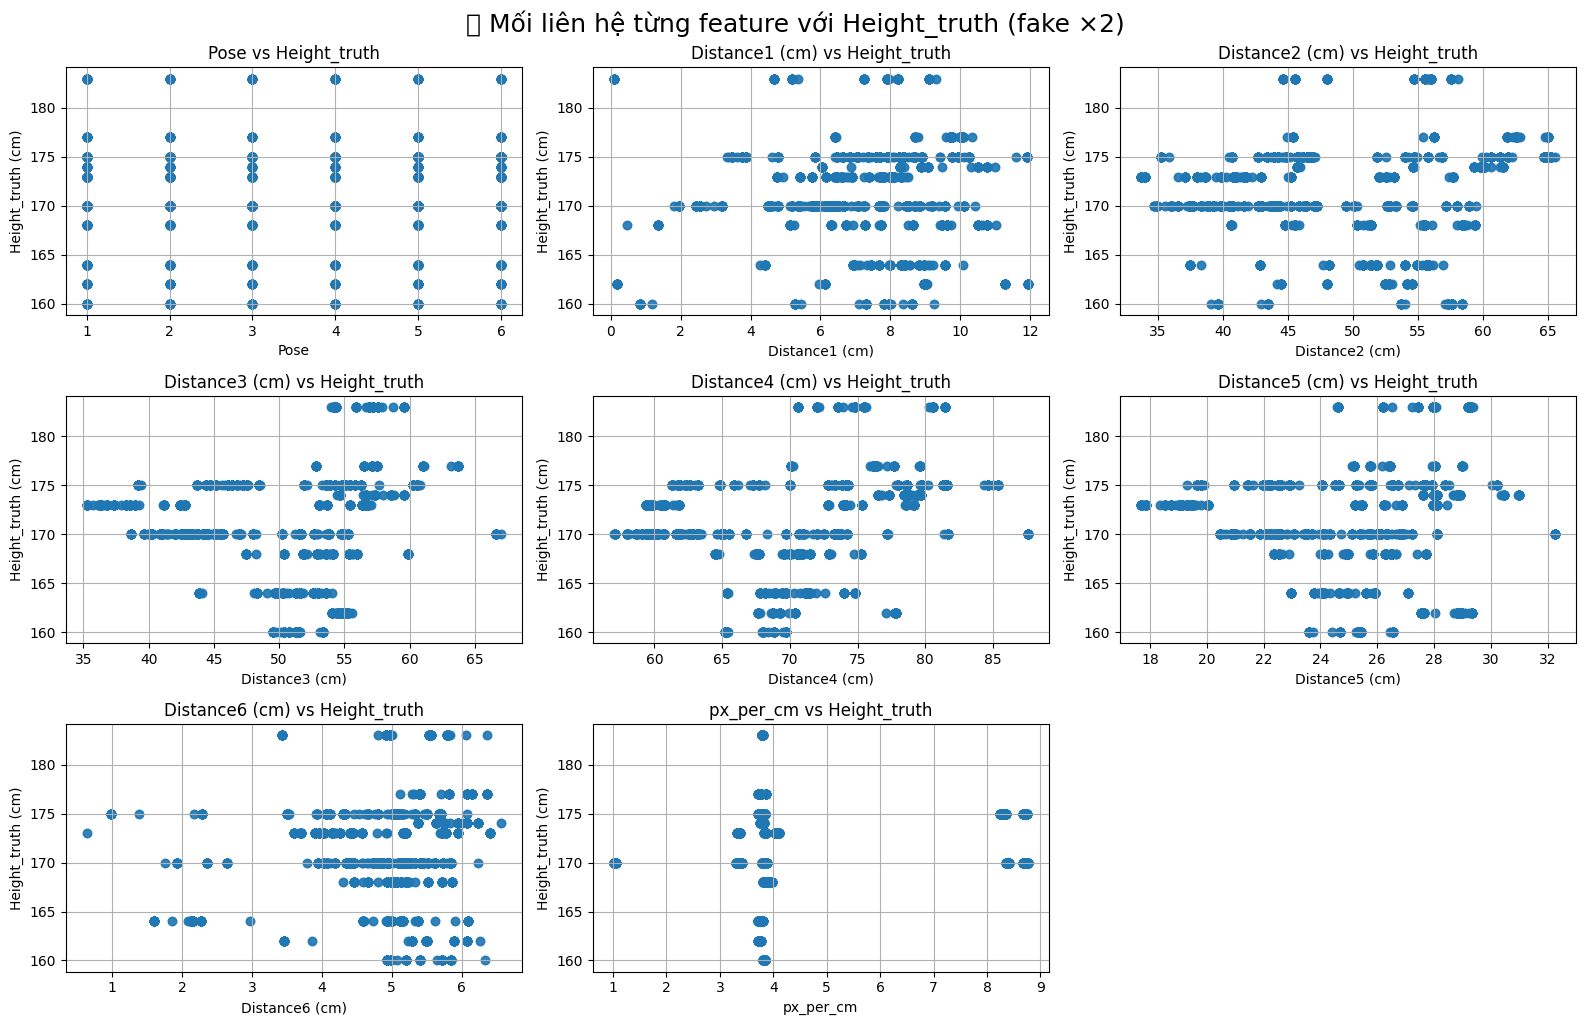

/home/unicode/miniconda3/envs/datn/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


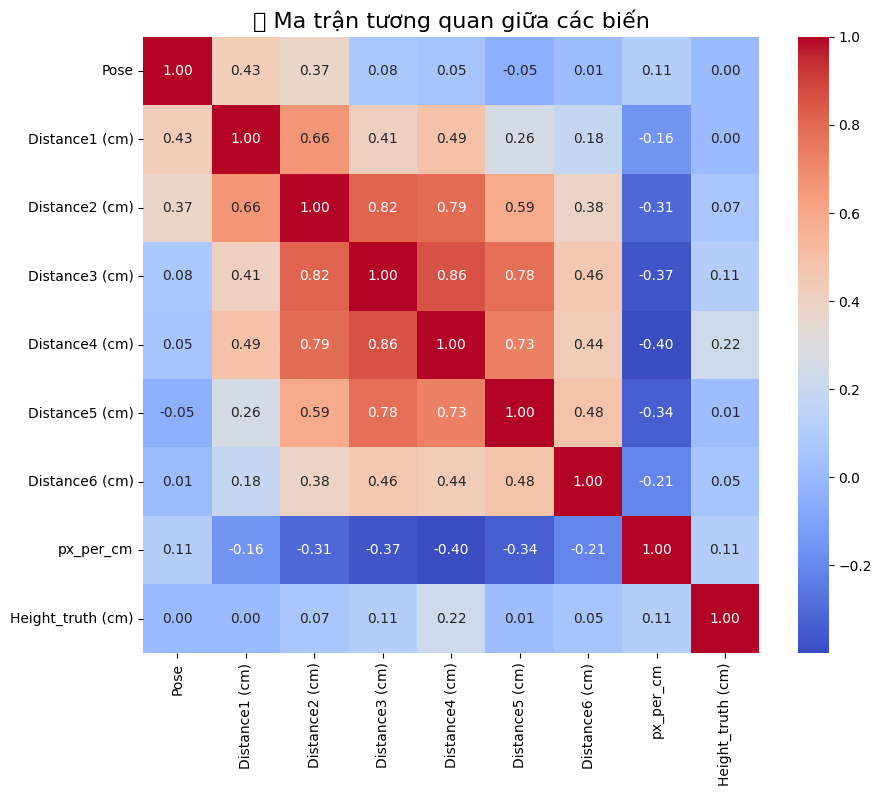

/tmp/ipykernel_1744/3012650435.py:61: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/unicode/miniconda3/envs/datn/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/unicode/miniconda3/envs/datn/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


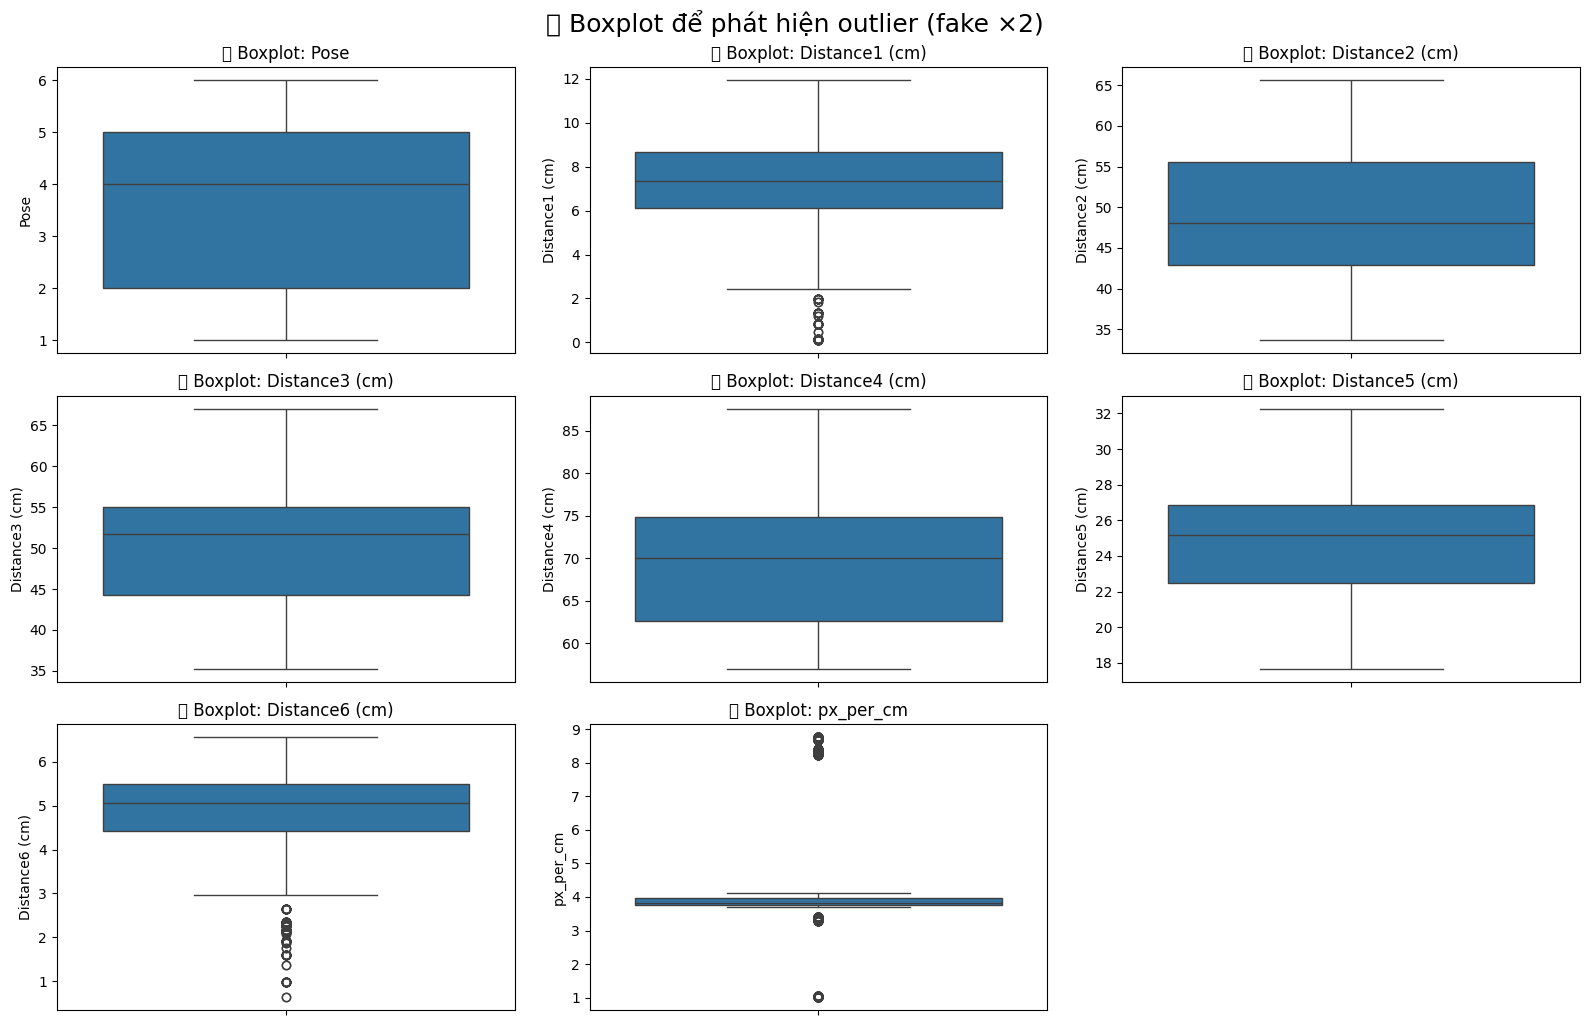

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc file CSV
df = pd.read_csv("../logic_app/common/csv/2D_distance.csv")  # <-- Đường dẫn file CSV


# ❌ Loại bỏ các cột không dùng cho mô hình
df = df.drop(columns=["Distance7 (cm)", "Height_Pre (cm)"])

# ✅ Fake data: nhân đôi số lượng dòng
df_fake = pd.concat([df, df], ignore_index=True)

# ---------------------------
# 1. Histogram cho từng đặc trưng
# ---------------------------
df_fake.drop(columns=["Height_truth (cm)"]).hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle("📊 Histogram phân bố các đặc trưng (fake ×2)", fontsize=16)
plt.tight_layout()
plt.show()

# ---------------------------
# 2. Biểu đồ Scatter: mỗi feature với y = Height_truth
# ---------------------------
target = "Height_truth (cm)"
features = df_fake.columns.drop(target)

plt.figure(figsize=(16, 10))
for idx, col in enumerate(features):
    plt.subplot(3, 3, idx + 1)
    plt.scatter(df_fake[col], df_fake[target], alpha=0.7)
    plt.xlabel(col)
    plt.ylabel("Height_truth (cm)")
    plt.title(f"{col} vs Height_truth")
    plt.grid(True)

plt.tight_layout()
plt.suptitle("🔍 Mối liên hệ từng feature với Height_truth (fake ×2)", fontsize=18, y=1.02)
plt.show()

# ---------------------------
# 3. Heatmap hệ số tương quan Pearson
# (Không cần fake vì hệ số tương quan không bị ảnh hưởng bởi số lượng dòng giống nhau)
# ---------------------------
plt.figure(figsize=(10, 8))
corr = df.corr()  # vẫn dùng df gốc
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("📈 Ma trận tương quan giữa các biến", fontsize=16)
plt.show()

# ---------------------------
# 4. Boxplot để phát hiện outliers
# ---------------------------
plt.figure(figsize=(16, 10))
for idx, col in enumerate(features):
    plt.subplot(3, 3, idx + 1)
    sns.boxplot(y=df_fake[col])
    plt.title(f"📦 Boxplot: {col}")

plt.tight_layout()
plt.suptitle("📌 Boxplot để phát hiện outlier (fake ×2)", fontsize=18, y=1.02)
plt.show()

📐 Skewness (độ lệch) của các đặc trưng:
Pose             -0.119425
Distance1 (cm)   -0.732709
Distance2 (cm)    0.110455
Distance3 (cm)   -0.272879
Distance4 (cm)    0.164998
Distance5 (cm)   -0.230414
Distance6 (cm)   -1.469473
px_per_cm         1.180329
dtype: float64

🧼 Missing values trong dataset:
Pose                 0
Distance1 (cm)       0
Distance2 (cm)       0
Distance3 (cm)       0
Distance4 (cm)       0
Distance5 (cm)       0
Distance6 (cm)       0
px_per_cm            0
Height_truth (cm)    0
dtype: int64

📊 Chỉ số VIF (phát hiện đa cộng tuyến):
          Feature         VIF
0           const  163.887955
1            Pose    1.607164
2  Distance1 (cm)    2.038674
3  Distance2 (cm)    6.273715
4  Distance3 (cm)    6.783944
5  Distance4 (cm)    5.016111
6  Distance5 (cm)    2.863866
7  Distance6 (cm)    1.354064
8       px_per_cm    1.248407


/home/unicode/miniconda3/envs/datn/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


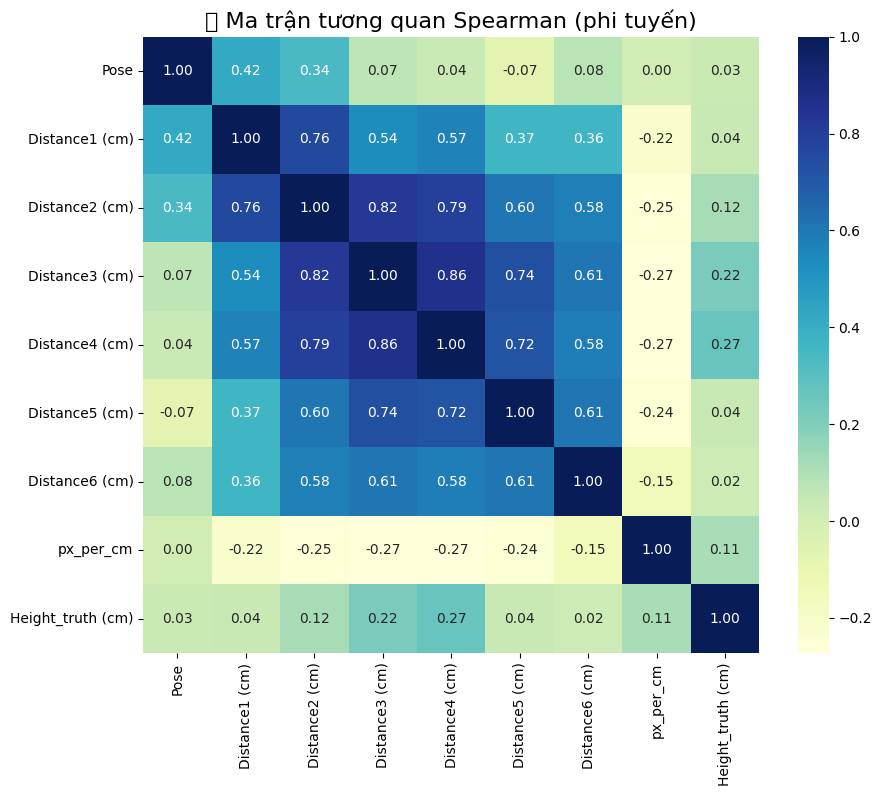

/home/unicode/miniconda3/envs/datn/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


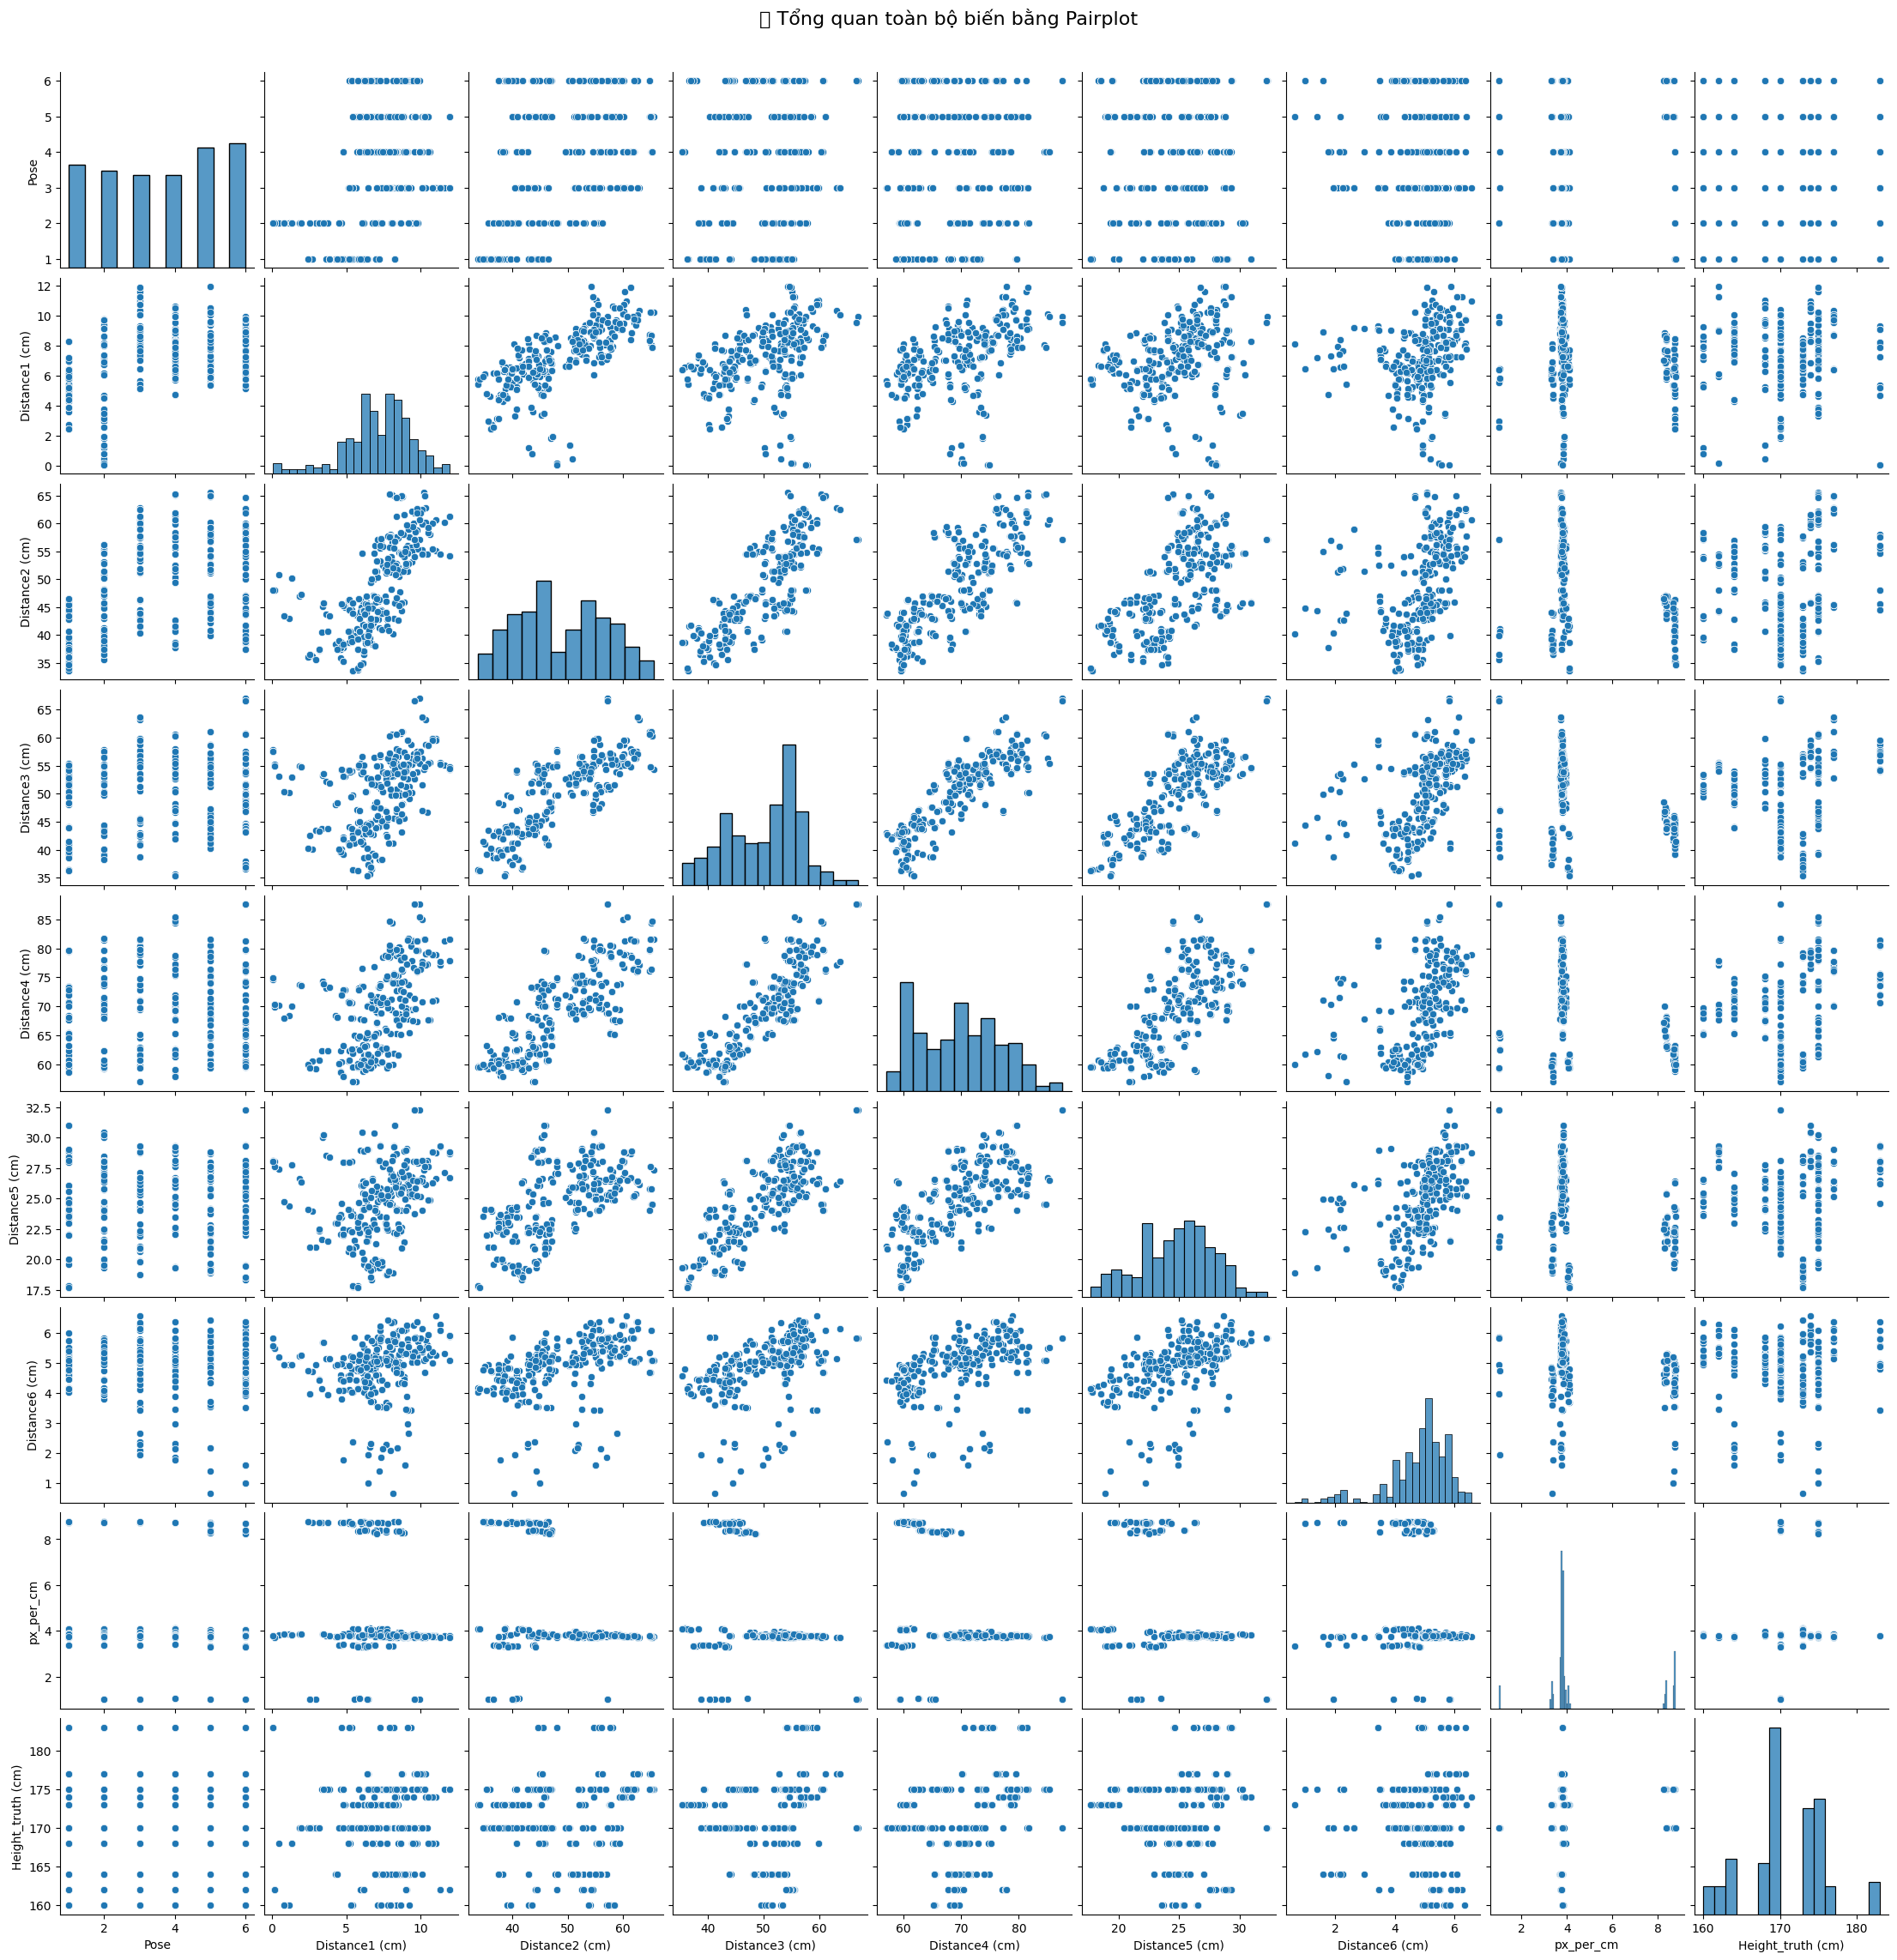

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# ---------------------------
# 1. Skewness - Độ lệch của các đặc trưng
# ---------------------------
print("📐 Skewness (độ lệch) của các đặc trưng:")
print(df[features].skew())

# ---------------------------
# 2. Kiểm tra Missing Values
# ---------------------------
print("\n🧼 Missing values trong dataset:")
print(df.isnull().sum())

# ---------------------------
# 3. VIF - Phát hiện đa cộng tuyến
# ---------------------------
X_vif = add_constant(df[features])  # Thêm cột bias để chạy VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print("\n📊 Chỉ số VIF (phát hiện đa cộng tuyến):")
print(vif_data)

# ---------------------------
# 4. Spearman correlation - Tương quan phi tuyến
# ---------------------------
plt.figure(figsize=(10, 8))
spearman_corr = df.corr(method='spearman')
sns.heatmap(spearman_corr, annot=True, cmap="YlGnBu", fmt=".2f", square=True)
plt.title("🔄 Ma trận tương quan Spearman (phi tuyến)", fontsize=16)
plt.show()

# ---------------------------
# 5. Pairplot - Tổng quan quan hệ giữa các biến
# ---------------------------
sns.pairplot(df)
plt.suptitle("🧩 Tổng quan toàn bộ biến bằng Pairplot", y=1.02, fontsize=16)
plt.show()


# Train model Linear 

In [11]:
import os
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ---------------------------
# 1. Tạo thư mục lưu kết quả
# ---------------------------
RESULTS_DIR = "/home/anodi108/Desktop/project/Do_An_Tot_Nghiep/DATN_PhamDangDong/DATN_PhamDangDong/resource/data/model/model_train"
os.makedirs(RESULTS_DIR, exist_ok=True)

# ---------------------------
# 2. Chuẩn bị dữ liệu
# ---------------------------
features = ["Distance1 (cm)", "Distance2 (cm)", "Distance3 (cm)",
            "Distance4 (cm)", "Distance5 (cm)", "Distance6 (cm)",]# "px_per_cm"]
target = "Height_truth (cm)"

X = df[features].values.astype(np.float32)
y = df[target].values.astype(np.float32).reshape(-1, 1)

# Chia tập train (60%), val (20%), test (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Chuyển thành tensor
train_ds = TensorDataset(torch.tensor(X_train), torch.tensor(y_train))
val_ds   = TensorDataset(torch.tensor(X_val), torch.tensor(y_val))
test_ds  = TensorDataset(torch.tensor(X_test), torch.tensor(y_test))

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=32, shuffle=False)

# ---------------------------
# 3. Định nghĩa mô hình PyTorch
# ---------------------------
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel(X.shape[1])
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# ---------------------------
# 4. Train model với 200 epoch
# ---------------------------
EPOCHS = 200
train_losses = []
val_losses = []

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0
    for xb, yb in train_loader:
        pred = model(xb)
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * xb.size(0)
    epoch_train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    # Evaluate validation loss
    model.eval()
    with torch.no_grad():
        val_pred = model(torch.tensor(X_val))
        val_loss = criterion(val_pred, torch.tensor(y_val))
        val_losses.append(val_loss.item())

    if epoch % 20 == 0 or epoch == EPOCHS - 1:
        print(f"Epoch {epoch+1}/{EPOCHS} - Train Loss: {epoch_train_loss:.4f} - Val Loss: {val_loss.item():.4f}")

# ---------------------------
# 5. Lưu model và biểu đồ loss
# ---------------------------
torch.save(model, os.path.join(RESULTS_DIR, "LinearRegressionTorch.pt"))

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.title("📉 Loss theo Epoch - Linear Regression (PyTorch)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, "LinearRegressionTorch_loss_curve.png"))
plt.close()

# ---------------------------
# 6. Dự đoán và lưu tiến trình train/val/test
# ---------------------------
model.eval()
with torch.no_grad():
    y_train_pred = model(torch.tensor(X_train)).numpy()
    y_val_pred = model(torch.tensor(X_val)).numpy()
    y_test_pred = model(torch.tensor(X_test)).numpy()

# Lưu file dự đoán
pd.DataFrame({"y_true": y_train.flatten(), "y_pred": y_train_pred.flatten()}).to_csv(f"{RESULTS_DIR}/LinearRegressionTorch_train_progress.csv", index=False)
pd.DataFrame({"y_true": y_val.flatten(), "y_pred": y_val_pred.flatten()}).to_csv(f"{RESULTS_DIR}/LinearRegressionTorch_val_progress.csv", index=False)
pd.DataFrame({"y_true": y_test.flatten(), "y_pred": y_test_pred.flatten()}).to_csv(f"{RESULTS_DIR}/LinearRegressionTorch_test_progress.csv", index=False)

# ---------------------------
# 7. Tính metrics và lưu
# ---------------------------
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

metrics_df = pd.DataFrame([{
    "Model": "LinearRegressionTorch",
    "MAE_Train": evaluate(y_train, y_train_pred)[0],
    "MSE_Train": evaluate(y_train, y_train_pred)[1],
    "RMSE_Train": evaluate(y_train, y_train_pred)[2],
    "R2_Train": evaluate(y_train, y_train_pred)[3],
    "MAE_Val": evaluate(y_val, y_val_pred)[0],
    "MSE_Val": evaluate(y_val, y_val_pred)[1],
    "RMSE_Val": evaluate(y_val, y_val_pred)[2],
    "R2_Val": evaluate(y_val, y_val_pred)[3],
    "MAE_Test": evaluate(y_test, y_test_pred)[0],
    "MSE_Test": evaluate(y_test, y_test_pred)[1],
    "RMSE_Test": evaluate(y_test, y_test_pred)[2],
    "R2_Test": evaluate(y_test, y_test_pred)[3],
    "Model_Path": os.path.join(RESULTS_DIR, "LinearRegressionTorch.pt")
}])
metrics_df.to_csv(f"{RESULTS_DIR}/LinearRegressionTorch_metrics.csv", index=False)

print("✅ Huấn luyện PyTorch Linear Regression xong! Đã lưu mô hình, loss curve, dự đoán, và metrics.")


Epoch 1/200 - Train Loss: 18798.3382 - Val Loss: 17525.2148
Epoch 21/200 - Train Loss: 1491.3171 - Val Loss: 1418.8038
Epoch 41/200 - Train Loss: 419.1592 - Val Loss: 372.8253
Epoch 61/200 - Train Loss: 416.0279 - Val Loss: 362.2781
Epoch 81/200 - Train Loss: 414.6793 - Val Loss: 360.5771
Epoch 101/200 - Train Loss: 413.0675 - Val Loss: 360.9686
Epoch 121/200 - Train Loss: 411.3341 - Val Loss: 357.7997
Epoch 141/200 - Train Loss: 409.4090 - Val Loss: 356.6524
Epoch 161/200 - Train Loss: 407.5740 - Val Loss: 356.1314
Epoch 181/200 - Train Loss: 405.3929 - Val Loss: 351.7113
Epoch 200/200 - Train Loss: 403.1784 - Val Loss: 349.4297
✅ Huấn luyện PyTorch Linear Regression xong! Đã lưu mô hình, loss curve, dự đoán, và metrics.


/tmp/ipykernel_5138/1900434580.py:98: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_5138/1900434580.py:99: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig(os.path.join(RESULTS_DIR, "LinearRegressionTorch_loss_curve.png"))


## Train model NN 

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Tạo thư mục lưu kết quả
RESULTS_DIR = "/home/anodi108/Desktop/project/Do_An_Tot_Nghiep/DATN_PhamDangDong/DATN_PhamDangDong/resource/data/model/model_train"
os.makedirs(RESULTS_DIR, exist_ok=True)

# ---------------------------
# 1. Chuẩn bị dữ liệu
# ---------------------------
features = ["Distance1 (cm)", "Distance2 (cm)", "Distance3 (cm)",
            "Distance4 (cm)", "Distance5 (cm)", "Distance6 (cm)",] # "px_per_cm"]
target = "Height_truth (cm)"

# df = df[df["Pose"] == 1].copy()
X = df[features]
y = df[target]

# Chia tập: train 60%, val 20%, test 20%
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Chuyển đổi dữ liệu sang PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train.values).reshape(-1, 1)
X_val_tensor = torch.FloatTensor(X_val_scaled)
y_val_tensor = torch.FloatTensor(y_val.values).reshape(-1, 1)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test.values).reshape(-1, 1)

# Tạo Dataset và DataLoader
class HeightDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = HeightDataset(X_train_tensor, y_train_tensor)
val_dataset = HeightDataset(X_val_tensor, y_val_tensor)
test_dataset = HeightDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

# ---------------------------
# 2. Định nghĩa model và hàm huấn luyện
# ---------------------------
class HeightNet(nn.Module):
    def __init__(self, input_size):
        super(HeightNet, self).__init__()
        
        # Layer 1
        self.layer1 = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        
        # Layer 2
        self.layer2 = nn.Sequential(
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2)
        )
        
        # Layer 3
        self.layer3 = nn.Sequential(
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0.1)
        )
        
        # Output layer
        self.output = nn.Linear(32, 1)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.output(x)
        return x

def evaluate(model, data_loader, criterion):
    model.eval()
    total_loss = 0
    all_preds = []
    all_targets = []
    
    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            total_loss += loss.item()
            all_preds.extend(outputs.numpy())
            all_targets.extend(y_batch.numpy())
    
    all_preds = np.array(all_preds).flatten()
    all_targets = np.array(all_targets).flatten()
    
    mae = mean_absolute_error(all_targets, all_preds)
    mse = mean_squared_error(all_targets, all_preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(all_targets, all_preds)
    
    return total_loss / len(data_loader), mae, mse, rmse, r2

def train_validate_test_model(model_name, num_epochs=250): # 250 là ổn nhất 
    # Khởi tạo model
    model = HeightNet(input_size=len(features))
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10, verbose=True)
    
    # Biến theo dõi best model
    best_val_rmse = float('inf')
    best_model_state = None
    
    # Lưu lịch sử huấn luyện
    history = {
        'train_loss': [], 'val_loss': [],
        'train_rmse': [], 'val_rmse': [],
        'learning_rate': []
    }
    
    for epoch in range(num_epochs):
        # Training
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        train_loss /= len(train_loader)
        
        # Validation
        val_loss, _, _, val_rmse, _ = evaluate(model, val_loader, criterion)
        
        # Cập nhật learning rate
        scheduler.step(val_loss)
        
        # Lưu lịch sử
        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['val_rmse'].append(val_rmse)
        history['learning_rate'].append(optimizer.param_groups[0]['lr'])
        
        # Lưu best model
        if val_rmse < best_val_rmse:
            best_val_rmse = val_rmse
            best_model_state = model.state_dict().copy()
            # Lưu best model
            # Lưu mô hình đầy đủ (có thể torch.load trực tiếp)
            torch.save(model, os.path.join(RESULTS_DIR, f"{model_name}_best.pt"))
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val RMSE: {val_rmse:.4f}, LR: {optimizer.param_groups[0]["lr"]:.6f}')
    
    # Lưu last model
    torch.save(model, os.path.join(RESULTS_DIR, f"{model_name}_last.pt"))
    
    # Đánh giá trên tập test với best model
    model = torch.load(os.path.join(RESULTS_DIR, f"{model_name}_best.pt"))
    test_loss, test_mae, test_mse, test_rmse, test_r2 = evaluate(model, test_loader, criterion)
    
    # Vẽ các biểu đồ phân tích
    plt.figure(figsize=(20, 15))
    
    # 1. Biểu đồ Loss và Learning Rate
    plt.subplot(2, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(2, 2, 2)
    plt.plot(history['learning_rate'], label='Learning Rate')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.title('Learning Rate Schedule')
    plt.legend()
    plt.grid(True)
    
    # 2. Biểu đồ RMSE
    plt.subplot(2, 2, 3)
    plt.plot(history['train_rmse'], label='Train RMSE')
    plt.plot(history['val_rmse'], label='Validation RMSE')
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')
    plt.title('Training and Validation RMSE')
    plt.legend()
    plt.grid(True)
    
    # 3. Biểu đồ dự đoán vs thực tế trên tập test
    model.eval()
    with torch.no_grad():
        test_preds = model(X_test_tensor).numpy()
    
    plt.subplot(2, 2, 4)
    plt.scatter(y_test, test_preds, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Thực tế (cm)')
    plt.ylabel('Dự đoán (cm)')
    plt.title('Dự đoán vs Thực tế (Test set)')
    plt.grid(True)
    
    plt.tight_layout()
    plt.savefig(os.path.join(RESULTS_DIR, f"{model_name}_training_analysis.png"))
    plt.close()
    
    # Vẽ biểu đồ phân phối lỗi
    plt.figure(figsize=(10, 6))
    errors = test_preds.flatten() - y_test.values
    sns.histplot(errors, kde=True)
    plt.axvline(x=0, color='r', linestyle='--')
    plt.xlabel('Lỗi dự đoán (cm)')
    plt.ylabel('Tần suất')
    plt.title('Phân phối lỗi dự đoán trên tập test')
    plt.grid(True)
    plt.savefig(os.path.join(RESULTS_DIR, f"{model_name}_error_distribution.png"))
    plt.close()
    
    # Vẽ biểu đồ so sánh các metrics
    metrics = {
        'MAE': test_mae,
        'MSE': test_mse,
        'RMSE': test_rmse,
        'R2': test_r2
    }
    
    plt.figure(figsize=(10, 6))
    plt.bar(metrics.keys(), metrics.values())
    plt.title('Các metrics đánh giá trên tập test')
    plt.grid(True)
    for i, v in enumerate(metrics.values()):
        plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')
    plt.savefig(os.path.join(RESULTS_DIR, f"{model_name}_metrics_comparison.png"))
    plt.close()
    
    # Vẽ biểu đồ scatter plot cho từng feature
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(features):
        plt.subplot(3, 3, i+1)
        plt.scatter(X_test[feature], y_test, alpha=0.5, label='Thực tế')
        plt.scatter(X_test[feature], test_preds, alpha=0.5, label='Dự đoán')
        plt.xlabel(feature)
        plt.ylabel('Chiều cao (cm)')
        plt.title(f'Feature: {feature}')
        plt.legend()
        plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(RESULTS_DIR, f"{model_name}_feature_analysis.png"))
    plt.close()
    
    # Lưu metrics
    metrics_df = pd.DataFrame([{
        "Model": model_name,
        "MAE_Test": test_mae,
        "MSE_Test": test_mse,
        "RMSE_Test": test_rmse,
        "R2_Test": test_r2,
        "Best_Val_RMSE": best_val_rmse,
        "Last_Model_Path": os.path.join(RESULTS_DIR, f"{model_name}_last.pt"),
        "Best_Model_Path": os.path.join(RESULTS_DIR, f"{model_name}_best.pt")
    }])
    metrics_df.to_csv(os.path.join(RESULTS_DIR, f"{model_name}_metrics.csv"), index=False)
    
    return metrics_df

# ---------------------------
# 3. Train và ghi toàn bộ kết quả
# ---------------------------
all_metrics = []

# Train model
metrics = train_validate_test_model("HeightNet")
all_metrics.append(metrics)

# Gộp và lưu tổng hợp
final_df = pd.concat(all_metrics, ignore_index=True)
final_df.to_csv(os.path.join(RESULTS_DIR, "all_models_metrics.csv"), index=False)

print(f"✅ Đã huấn luyện xong và lưu kết quả vào thư mục `{RESULTS_DIR}/`")
print("📁 Các model đã được lưu:")
print(f"   - HeightNet: {os.path.join(RESULTS_DIR, 'HeightNet_best.pt')} và {os.path.join(RESULTS_DIR, 'HeightNet_last.pt')}")
final_df

/home/anodi108/anaconda3/envs/datn/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [10/250], Train Loss: 29514.3281, Val Loss: 28407.1758, Val RMSE: 168.5443, LR: 0.001000
Epoch [20/250], Train Loss: 29456.3535, Val Loss: 28373.5254, Val RMSE: 168.4444, LR: 0.001000
Epoch [30/250], Train Loss: 29426.7988, Val Loss: 28313.5898, Val RMSE: 168.2664, LR: 0.001000
Epoch [40/250], Train Loss: 29374.9434, Val Loss: 28257.2754, Val RMSE: 168.0990, LR: 0.001000
Epoch [50/250], Train Loss: 29270.5234, Val Loss: 28217.4688, Val RMSE: 167.9806, LR: 0.001000
Epoch [60/250], Train Loss: 29219.8105, Val Loss: 28177.7871, Val RMSE: 167.8624, LR: 0.001000
Epoch [70/250], Train Loss: 29168.6895, Val Loss: 28123.2344, Val RMSE: 167.6998, LR: 0.001000
Epoch [80/250], Train Loss: 29096.8047, Val Loss: 28064.1836, Val RMSE: 167.5237, LR: 0.001000
Epoch [90/250], Train Loss: 28995.4355, Val Loss: 28021.0000, Val RMSE: 167.3948, LR: 0.001000
Epoch [100/250], Train Loss: 28972.9746, Val Loss: 27981.2383, Val RMSE: 167.2759, LR: 0.001000
Epoch [110/250], Train Loss: 28878.4355, Val Loss

/tmp/ipykernel_5138/3364898922.py:191: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(os.path.join(RESULTS_DIR, f"{model_name}_best.pt"))


✅ Đã huấn luyện xong và lưu kết quả vào thư mục `/home/anodi108/Desktop/project/Do_An_Tot_Nghiep/DATN_PhamDangDong/DATN_PhamDangDong/resource/data/model/model_train/`
📁 Các model đã được lưu:
   - HeightNet: /home/anodi108/Desktop/project/Do_An_Tot_Nghiep/DATN_PhamDangDong/DATN_PhamDangDong/resource/data/model/model_train/HeightNet_best.pt và /home/anodi108/Desktop/project/Do_An_Tot_Nghiep/DATN_PhamDangDong/DATN_PhamDangDong/resource/data/model/model_train/HeightNet_last.pt


,Model,MAE_Test,MSE_Test,RMSE_Test,R2_Test,Best_Val_RMSE,Last_Model_Path,Best_Model_Path
0,HeightNet,166.978958,27953.050781,167.191659,-310.142578,163.429726,/home/anodi108/Desktop/project/Do_An_Tot_Nghie...,/home/anodi108/Desktop/project/Do_An_Tot_Nghie...


# Train model RandomFoest

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# ---------------------------
# 1. Cấu hình
# ---------------------------
RESULTS_DIR = "/mnt/d/project/DATN/DATN_PhamDangDong/resource/data/model/model_train"
os.makedirs(RESULTS_DIR, exist_ok=True)
MODEL_NAME = "RandomForestSklearn"

# ---------------------------
# 2. Chuẩn bị dữ liệu
# ---------------------------
features = ["Distance1 (cm)", "Distance2 (cm)", "Distance3 (cm)",
            "Distance4 (cm)", "Distance5 (cm)", "Distance6 (cm)",] # "px_per_cm"]
target = "Height_truth (cm)"

X = df[features].values
y = df[target].values

# Chia tập train/val/test: 60% - 20% - 20%
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# ---------------------------
# 3. Train mô hình Random Forest
# ---------------------------
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Lưu mô hình
model_path = os.path.join(RESULTS_DIR, f"{MODEL_NAME}.joblib")
joblib.dump(model, model_path)

# ---------------------------
# 4. Dự đoán
# ---------------------------
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# ---------------------------
# 5. Đánh giá và lưu metrics
# ---------------------------
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

metrics_df = pd.DataFrame([{
    "Model": MODEL_NAME,
    "MAE_Train": evaluate(y_train, y_train_pred)[0],
    "MSE_Train": evaluate(y_train, y_train_pred)[1],
    "RMSE_Train": evaluate(y_train, y_train_pred)[2],
    "R2_Train": evaluate(y_train, y_train_pred)[3],
    "MAE_Val": evaluate(y_val, y_val_pred)[0],
    "MSE_Val": evaluate(y_val, y_val_pred)[1],
    "RMSE_Val": evaluate(y_val, y_val_pred)[2],
    "R2_Val": evaluate(y_val, y_val_pred)[3],
    "MAE_Test": evaluate(y_test, y_test_pred)[0],
    "MSE_Test": evaluate(y_test, y_test_pred)[1],
    "RMSE_Test": evaluate(y_test, y_test_pred)[2],
    "R2_Test": evaluate(y_test, y_test_pred)[3],
    "Model_Path": model_path
}])
metrics_df.to_csv(f"{RESULTS_DIR}/{MODEL_NAME}_metrics.csv", index=False)

# ---------------------------
# 6. Lưu dự đoán
# ---------------------------
pd.DataFrame({"y_true": y_train, "y_pred": y_train_pred}).to_csv(f"{RESULTS_DIR}/{MODEL_NAME}_train_progress.csv", index=False)
pd.DataFrame({"y_true": y_val, "y_pred": y_val_pred}).to_csv(f"{RESULTS_DIR}/{MODEL_NAME}_val_progress.csv", index=False)
pd.DataFrame({"y_true": y_test, "y_pred": y_test_pred}).to_csv(f"{RESULTS_DIR}/{MODEL_NAME}_test_progress.csv", index=False)

# ---------------------------
# 7. Vẽ biểu đồ dự đoán vs thực tế (test)
# ---------------------------
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ground Truth')
plt.xlabel("Thực tế")
plt.ylabel("Dự đoán")
plt.title(f"📊 {MODEL_NAME} - Dự đoán vs Thực tế (Test set)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{RESULTS_DIR}/{MODEL_NAME}_test_plot.png")
plt.close()

print(f"✅ Huấn luyện {MODEL_NAME} hoàn tất! Kết quả lưu tại {RESULTS_DIR}/")


✅ Huấn luyện RandomForestSklearn hoàn tất! Kết quả lưu tại /mnt/d/project/DATN/DATN_PhamDangDong/resource/data/model/model_train/


/tmp/ipykernel_1744/2236276642.py:95: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1744/2236276642.py:96: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig(f"{RESULTS_DIR}/{MODEL_NAME}_test_plot.png")


# Train model linear 1

ValueError: x and y must be the same size

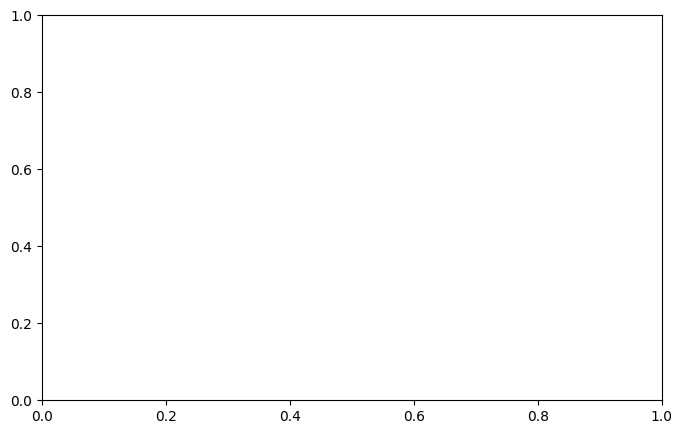

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
import joblib  # ✅ THÊM: import joblib để lưu model

# 1. Tạo thư mục lưu kết quả
RESULTS_DIR = "../resource/data/model/model_train"
os.makedirs(RESULTS_DIR, exist_ok=True)

# 2. Chuẩn bị dữ liệu
features = ["Distance1 (cm)", "Distance2 (cm)", "Distance3 (cm)",
            "Distance4 (cm)", "Distance5 (cm)", "Distance6 (cm)"]
target = "Height_truth (cm)"

df_pose1 = df[df["Pose"] == 1].copy()
X = df_pose1[features].values
y = df_pose1[target].values

# # PCA để giảm số chiều về 1 feature duy nhất
# pca = PCA(n_components=1)
# X = pca.fit_transform(X)

# Chia tập train, val, test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# 3. Train model
model = LinearRegression()
model.fit(X_train, y_train)

# ✅ LƯU MÔ HÌNH
model_path = os.path.join(RESULTS_DIR, "LinearRegression_model.joblib")
joblib.dump(model, model_path)

# 4. Dự đoán
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# 5. Đánh giá
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

metrics_df = pd.DataFrame([{
    "Model": "LinearRegression_SKLearn",
    "MAE_Train": evaluate(y_train, y_train_pred)[0],
    "MSE_Train": evaluate(y_train, y_train_pred)[1],
    "RMSE_Train": evaluate(y_train, y_train_pred)[2],
    "R2_Train": evaluate(y_train, y_train_pred)[3],
    "MAE_Val": evaluate(y_val, y_val_pred)[0],
    "MSE_Val": evaluate(y_val, y_val_pred)[1],
    "RMSE_Val": evaluate(y_val, y_val_pred)[2],
    "R2_Val": evaluate(y_val, y_val_pred)[3],
    "MAE_Test": evaluate(y_test, y_test_pred)[0],
    "MSE_Test": evaluate(y_test, y_test_pred)[1],
    "RMSE_Test": evaluate(y_test, y_test_pred)[2],
    "R2_Test": evaluate(y_test, y_test_pred)[3]
}])
metrics_df.to_csv(f"{RESULTS_DIR}/LinearRegression_metrics.csv", index=False)

# 6. Lưu file dự đoán
pd.DataFrame({"y_true": y_train, "y_pred": y_train_pred}).to_csv(f"{RESULTS_DIR}/LinearRegression_train1.csv", index=False)
pd.DataFrame({"y_true": y_val, "y_pred": y_val_pred}).to_csv(f"{RESULTS_DIR}/LinearRegression_val1.csv", index=False)
pd.DataFrame({"y_true": y_test, "y_pred": y_test_pred}).to_csv(f"{RESULTS_DIR}/LinearRegression_test1.csv", index=False)

# 7. Vẽ biểu đồ
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, label="Ground Truth", color='blue', alpha=0.6)
X_line = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
y_line = model.predict(X_line)
plt.plot(X_line, y_line, label="Linear Model", color='red', linewidth=2)
plt.title("📈 Dự đoán chiều cao với Linear Regression (PCA = 1)")
plt.xlabel("PCA Feature (1D)")
plt.ylabel("Chiều cao (cm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, "LinearRegression_PCA1_with_line.png"))
plt.close()

print(f"✅ Huấn luyện Linear Regression (scikit-learn) xong! Đã lưu model tại:\n{model_path}")
